#use `selenium` to grab lottery data from web
配合selenium IDE真是好用XD

In [10]:
from selenium import webdriver

In [145]:
driver = webdriver.Firefox()

In [146]:
driver.get('http://www.taiwanlottery.com.tw/lotto/Lotto649/history.aspx')
def get_info(number):
    driver.find_element_by_id("Lotto649Control_history_radNO").click()
    # 期號   number = "103 + 000103" max 18x
    driver.find_element_by_id("Lotto649Control_history_txtNO").clear()
    driver.find_element_by_id("Lotto649Control_history_txtNO").send_keys(number)
    driver.find_element_by_id("Lotto649Control_history_btnSubmit").click()
    if driver.find_element_by_id("Lotto649Control_history_Label1").text == u"查無資料" : 
        return False
    else:
        price = driver.find_element_by_id("Lotto649Control_history_dlQuery_Total_0").text
        sell = driver.find_element_by_id("Lotto649Control_history_dlQuery_L649_SellAmount_0").text
        date = driver.find_element_by_id("Lotto649Control_history_dlQuery_L649_DDate_0").text
        ans = []
        special =driver.find_element_by_id("Lotto649Control_history_dlQuery_No7_0".format()).text
        for i in range(1,7):
            ans.append(driver.find_element_by_id("Lotto649Control_history_dlQuery_SNo{0}_0".format(i)).text)
        return (number, date, sell, price, ans, special)

In [147]:
result= []
for y in [103,104]:
    for i in range(1,150):
        result.append(get_info('{}{:0>6}'.format(y,i)))

NoSuchWindowException: Message: Window not found. The browser window may have been closed.
Stacktrace:
    at nsCommandProcessor.prototype.execute (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/command-processor.js:12343)
    at Dispatcher.executeAs/< (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/driver-component.js:9061)
    at Resource.prototype.handle (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/driver-component.js:9208)
    at Dispatcher.prototype.dispatch (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/driver-component.js:9155)
    at WebDriverServer/<.handle (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/driver-component.js:12128)
    at createHandlerFunc/< (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/httpd.js:2058)
    at ServerHandler.prototype.handleResponse (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/httpd.js:2391)
    at Connection.prototype.process (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/httpd.js:1227)
    at RequestReader.prototype._handleResponse (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/httpd.js:1681)
    at RequestReader.prototype._processBody (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/httpd.js:1529)
    at RequestReader.prototype.onInputStreamReady (file:///c:/users/falcon/appdata/local/temp/tmpijutom/extensions/fxdriver@googlecode.com/components/httpd.js:1397)

In [15]:
print len(result)
result

89


[('103000001',
  u'103/01/03',
  u'146,792,850',
  u'80,736,067',
  [u'11', u'35', u'21', u'18', u'37', u'20'],
  u'08'),
 ('103000002',
  u'103/01/07',
  u'132,190,750',
  u'106,318,850',
  [u'01', u'07', u'25', u'36', u'21', u'35'],
  u'39'),
 ('103000003',
  u'103/01/10',
  u'140,617,450',
  u'149,849,635',
  [u'07', u'19', u'17', u'30', u'37', u'32'],
  u'03'),
 ('103000004',
  u'103/01/14',
  u'128,619,400',
  u'70,740,670',
  [u'11', u'49', u'02', u'45', u'41', u'21'],
  u'26'),
 ('103000005',
  u'103/01/17',
  u'141,157,800',
  u'108,354,326',
  [u'20', u'29', u'13', u'15', u'26', u'36'],
  u'37'),
 ('103000006',
  u'103/01/21',
  u'132,900,400',
  u'141,270,573',
  [u'22', u'43', u'12', u'44', u'38', u'15'],
  u'09'),
 ('103000007',
  u'103/01/24',
  u'143,544,500',
  u'172,467,560',
  [u'04', u'20', u'29', u'41', u'45', u'01'],
  u'36'),
 ('103000008',
  u'103/01/28',
  u'157,096,650',
  u'218,922,795',
  [u'02', u'30', u'07', u'26', u'05', u'01'],
  u'24'),
 ('103000009',
  u

#data cleaning using Pandas


In [16]:
# remove false
nr = [r for r in result if r != False]

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
df = pd.DataFrame(nr)

In [19]:
df.columns= ['no','date','sale','prize','ans','special']

In [20]:
#set no as index
df.set_index('no')


,date,sale,prize,ans,special
no,,,,,
103000001,103/01/03,"146,792,850","80,736,067","[11, 35, 21, 18, 37, 20]",08
103000002,103/01/07,"132,190,750","106,318,850","[01, 07, 25, 36, 21, 35]",39
103000003,103/01/10,"140,617,450","149,849,635","[07, 19, 17, 30, 37, 32]",03
103000004,103/01/14,"128,619,400","70,740,670","[11, 49, 02, 45, 41, 21]",26
103000005,103/01/17,"141,157,800","108,354,326","[20, 29, 13, 15, 26, 36]",37
103000006,103/01/21,"132,900,400","141,270,573","[22, 43, 12, 44, 38, 15]",09
103000007,103/01/24,"143,544,500","172,467,560","[04, 20, 29, 41, 45, 01]",36
103000008,103/01/28,"157,096,650","218,922,795","[02, 30, 07, 26, 05, 01]",24
103000009,103/01/30,"608,966,100","334,931,355","[09, 22, 49, 48, 45, 44]",08


In [21]:
#convert to int
df['special']= df['special'].map(int)
#convert string 123,000 to int 123000
def clean_int(s):
    return int(s.replace(',',''))
df.sale = df.sale.map(clean_int)
df.prize = df.prize.map(clean_int)

In [22]:
#convert draw results(ans) of lottery from list to each columns
for i in range (1,7):
    df[str(i)] = df.ans.map(lambda x : x[i-1])
del df['ans']

In [23]:
for i in range(1,7):
    df[str(i)]=df[str(i)].map(int)

In [24]:
#convert 民國 to 西元 and to datetime
import datetime
def date_clean(s):
    y, m , d=s.split('/')
    return datetime.date(int(y)+1911,int(m),int(d))
pd.date = pd.to_datetime(df.date.map(date_clean))

In [25]:
df.head()

,no,date,sale,prize,special,1,2,3,4,5,6
0,103000001,103/01/03,146792850,80736067,8,11,35,21,18,37,20
1,103000002,103/01/07,132190750,106318850,39,1,7,25,36,21,35
2,103000003,103/01/10,140617450,149849635,3,7,19,17,30,37,32
3,103000004,103/01/14,128619400,70740670,26,11,49,2,45,41,21
4,103000005,103/01/17,141157800,108354326,37,20,29,13,15,26,36


In [26]:
#person = 當次營收 / 50 
person = df.sale/50
data = zip(person.tolist(),df.prize.tolist())

In [148]:
#計算期望值
import math
def expect(people,last,show=False):
    f=math.factorial
    def c(x,y):
        return 1.0*f(y)/f(y-x)/f(x)
    prob1 = [
        1/c(6,49),
        c(5,6)/c(6,49),
        c(1,42)*c(5,6)/c(6,49),
        c(1,42)*c(4,6)/c(6,49),
        c(2,42)*c(4,6)/c(6,49),
        ]
    prob2 = [
        c(2,42)*c(3,6)/c(6,49),
        c(3,42)*c(2,6)/c(6,49),
        c(3,42)*c(3,6)/c(6,49)
         ]
    prize2 = [
        1000.0,
        400.0,
        400.0
    ]
    ssum = 1.0* people * sum(pr*w for pr,w in zip(prob2,prize2))
    rest = 1.0* last - ssum
    prize1 = [
        0.73 * rest , 
        0.06 * rest , 
        0.06 * rest , 
        0.04 * rest , 
        0.11 * rest , 
    ]
    PRIZE = prize1 + prize2
    PROB = prob1 + prob2
    
    exp2 = sum(pr*w for pr,w in zip(prob2,prize2) )
    exp1 = sum ( w/people*(1-(1-p)**people) for p,w in zip(prob1,prize1) )
    if show:
        print "{0:>10} : {1: <}".format('people','win')
        for w,p in zip(PRIZE,PROB):
            print "{0:>10.2f} : {1: <.1f}".format(people * p, int(w))
        print 'expect = ', expect(people,last)
    return exp1 + exp2 #, exp1, exp2, rest

last = 155330506
people = 113047450 / 50
expect(people,last,show=True)

    people : win
      0.16 : 92389227.0
      0.97 : 7593635.0
     40.74 : 7593635.0
    101.86 : 5062423.0
   2088.14 : 13921664.0
   2784.19 : 1000.0
  27841.86 : 400.0
  37122.48 : 400.0
expect =  32.6657870818


32.6657870818263

In [98]:
r = []
for people, last in data:
    r.append(expect(people,last))
r

[27.49999982969198,
 40.214179131293236,
 53.282730912841899,
 27.5,
 38.380566288224955,
 53.149039807254155,
 60.074597076168025,
 69.677741377680562,
 27.5,
 38.101448299296585,
 49.621039953449383,
 29.6459871015077,
 32.171949008773822,
 40.587597119786324,
 63.292861296997359,
 30.454005064486637,
 39.400894889247255,
 53.88642042608469,
 66.930741686703186,
 77.366584071372642,
 27.5,
 60.034368082708696,
 59.435626624451878,
 57.618701919511324,
 27.499999780732814,
 39.47967481114938,
 51.546383045488447,
 65.281807394009789,
 73.929212683755935,
 87.178807631747674,
 31.660449381861582,
 38.316687465940703,
 63.270557757075672,
 64.488165945122915,
 29.234437199584253,
 69.959088279301739,
 27.5,
 39.243737660755201,
 50.975817543950733,
 63.375448880971994,
 73.955917671218572,
 31.137901760606336,
 44.871043342369767,
 52.974626995377832,
 62.547429691725952,
 94.916840747208596,
 115.19372810622016,
 27.499999770655563,
 39.787342564812597,
 53.714073269082284,
 65.0320639

In [99]:
#add expected value to dataframe
df['exp']= pd.Series(r)

In [100]:
# list some of the highest expected values
df.sort_index(by='exp',ascending=False).head()

,no,date,sale,prize,special,1,2,3,4,5,6,exp,people
62,103000063,103/07/25,155118450,360227761,26,45,30,21,32,5,35,116.113770,3102369
46,103000047,103/05/30,183799350,423450647,15,21,9,17,35,24,30,115.193728,3675987
61,103000062,103/07/22,146404500,323417074,14,28,3,13,9,17,42,110.453256,2928090
60,103000061,103/07/18,143077350,293429553,40,19,15,21,2,30,1,102.542280,2861547
59,103000060,103/07/15,122148700,248944891,13,7,32,18,23,48,34,101.902391,2442974


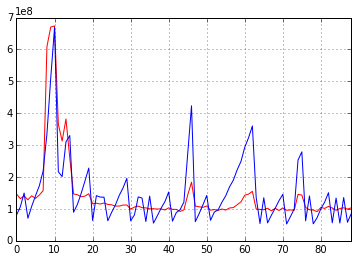

In [101]:
# to see the relationship between 本次總獎金 , 銷售金額
df.sale.plot(color='r')
df.prize.plot(color='b')
df.exp.plot()


In [102]:
# 把所有數字的抽到次數算出來
# Series的concat怪怪的用奇怪的方法workarond
l = []
for i in range(1,7):
    l.extend(df[str(i)].tolist())
l.extend(df['special'].tolist())

35    19
32    19
15    17
18    17
8     16
9     16
19    16
23    16
30    16
37    16
dtype: int64


12

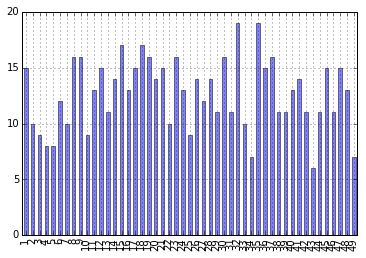

In [103]:
s = pd.Series(l)
print s.value_counts().head(10)
s.value_counts().sort_index().plot(kind='bar',alpha=0.5)
#average times that each number will be drawed is 20
len(df)/7

In [104]:
#分成前半部跟後半部看看是否分布有所不同
U = df.loc[0:(len(df)/2)]
L = df.loc[len(df)/2:]
len(df), len(U),len(L)

(89, 45, 45)

In [105]:
Ul = []
for i in range(1,7):
    Ul.extend(U[str(i)].tolist())
Ul.extend(U['special'].tolist())
Ul = pd.Series(Ul)

In [106]:
Ll = []
for i in range(1,7):
    Ll.extend(L[str(i)].tolist())
Ll.extend(L['special'].tolist())
Ll = pd.Series(Ll)

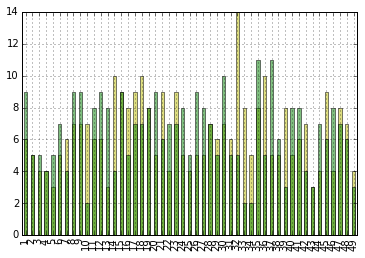

In [107]:
a = Ll.value_counts()
b = Ul.value_counts()
a = a.sort_index()
b = b.sort_index()
a.plot(kind='bar',alpha=0.5,color='y')
b.plot(kind='bar',alpha=0.5,color='g')
#黃色後半 綠色前半

In [108]:
#找出前半與後半都高於平均的號碼
df2 = pd.DataFrame([a,b])
df2 = df2.T
df2.sort()

,0,1
1,6,9
2,5,5
3,4,5
4,4,4
5,3,5
6,5,7
7,6,4
8,7,9
9,7,9
10,7,2


In [109]:
k = df2[(df2[1] > 10)& (df2[0] > 10)].sum(axis=1)
k.sort(ascending=False)
k

Series([], dtype: float64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012F03F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011F97128>]], dtype=object)

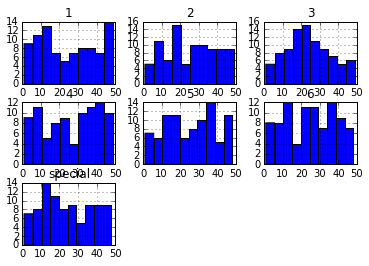

In [110]:
df[['special',u'1', u'2', u'3', u'4', u'5', u'6']].describe()
df[['special',u'1', u'2', u'3', u'4', u'5', u'6']].hist()

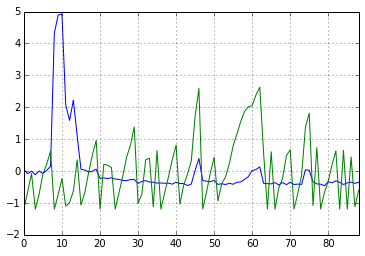

In [111]:
# standardization SALE and EXP
a = ( df.sale -df.sale.mean() ) / df.sale.std()
b = ( df.exp -df.exp.mean() ) / df.exp.std()
a.plot()
b.plot()

count     89.000000
mean      55.156128
std       23.170689
min       27.500000
25%       38.101448
50%       52.974627
75%       69.200675
max      116.113770
Name: exp, dtype: float64

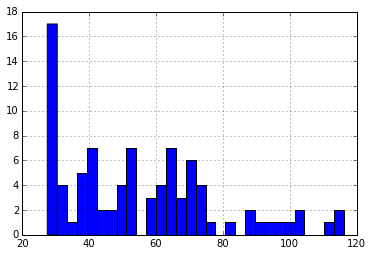

In [112]:
#期望值的數據
df.exp.hist(bins=30)
df.exp.describe()

In [113]:
df['people'] = df.sale / 50

In [149]:
df['exp'] =[expect(p,w) for w, p in zip(df.prize , df.people)]

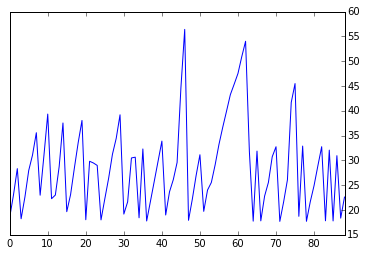

In [151]:
df.exp.plot(secondary_y=True)

In [152]:
(df.exp -50 ).describe()
#(df.exp-50).plot()

count    89.000000
mean    -21.453765
std       8.946024
min     -32.296764
25%     -28.220838
50%     -21.658784
75%     -17.245860
max       6.412923
Name: exp, dtype: float64

In [143]:
df.iloc[81]

no         103000082
date       103/09/30
sale       101577500
prize      121534477
special           15
1                 49
2                 41
3                 18
4                 47
5                 36
6                 35
exp         59.82352
people       2031550
Name: 81, dtype: object